# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [23]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
# Inspect the shapes of the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# here X feature set is 3D array

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

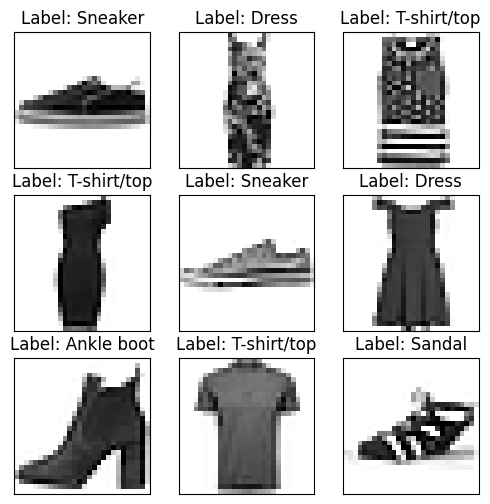

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
image quality is ok, but T-shirt/Top can be confusing. And there in the above Sandal, there is shadow in the background.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D vector
model.add(Dense(10)) # no activation function, so it's a linear layer, 10 output units for 10 classes

# Compile the model using `model.compile()`
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Train the model with `model.fit()`
model.fit(
    X_train, 
    y_train_onehot, 
    epochs=5, 
    batch_size=32, 
    validation_split=0.2,)
# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
   1/1500 ━━━━━━━━━━━━━━━━━━━━ 3:14 130ms/step - accuracy: 0.0312 - loss: 3.7627

/Users/haichenzhang/dev/DSI_learning/deep_learning/deep-learning-env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.1236 - loss: 9.0605 - val_accuracy: 0.1110 - val_loss: 8.3812
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.1059 - loss: 9.1171 - val_accuracy: 0.1002 - val_loss: 9.9340
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.1105 - loss: 8.7682 - val_accuracy: 0.1075 - val_loss: 8.4162
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.1048 - loss: 8.6154 - val_accuracy: 0.1005 - val_loss: 9.1677
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.1031 - loss: 8.6443 - val_accuracy: 0.1018 - val_loss: 8.1656
Loss:     8.26
Accuracy: 10.33%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
With Accuracy ≈ 10.33% and Loss ≈ 8.26, your baseline is performing at random chance level. I think model is not learning the right mapping.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [32]:
from keras.layers import Conv2D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Convolutional layer(s)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layer(s)
model.add(Dense(128, activation='relu'))

# Output layer (10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    X_train,
    y_train_onehot,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_onehot)

print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8529 - loss: 0.4119 - val_accuracy: 0.8855 - val_loss: 0.3144
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.2800 - val_accuracy: 0.8992 - val_loss: 0.2796
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.2343 - val_accuracy: 0.9095 - val_loss: 0.2501
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2018 - val_accuracy: 0.9043 - val_loss: 0.2652
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9357 - loss: 0.1741 - val_accuracy: 0.9119 - val_loss: 0.2430
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9082 - loss: 0.2635
Loss: 0.26
Accuracy: 90.82%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
CNN performed much better than your baseline, by 90.82 / 10.33 ≈ 8.8× higher accuracy. CNNs use spatial structure, whereas a baseline linear/Dense-only model doesn’t capture these local spatial features well.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [33]:
# A. Test Hyperparameters
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_cnn(num_filters):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

filter_values = [16, 32, 64]
test_accuracies = []

for f in filter_values:
    model = build_cnn(f)  # re-initialize each time

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(
        X_train,
        y_train_onehot,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    loss, acc = model.evaluate(X_test, y_test_onehot, verbose=0)
    test_accuracies.append(acc)

    print(f"Filters: {f} -> Test Accuracy: {acc*100:.2f}%")

Filters: 16 -> Test Accuracy: 90.58%
Filters: 32 -> Test Accuracy: 90.61%
Filters: 64 -> Test Accuracy: 91.25%


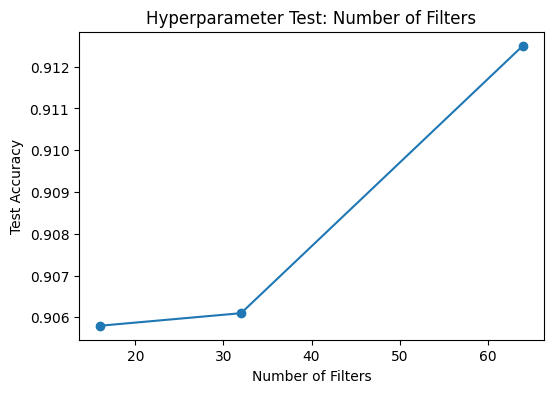

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(filter_values, test_accuracies, marker='o')
plt.xlabel("Number of Filters")
plt.ylabel("Test Accuracy")
plt.title("Hyperparameter Test: Number of Filters")
plt.show()

In [36]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

def build_cnn_with_dropout(use_dropout):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    if use_dropout:
        model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    return model

dropout_options = [False, True]
dropout_accs = []

for use_dropout in dropout_options:
    model = build_cnn_with_dropout(use_dropout)  # re-initialize each time

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(
        X_train,
        y_train_onehot,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    loss, acc = model.evaluate(X_test, y_test_onehot, verbose=0)
    dropout_accs.append(acc)

    print(f"Dropout: {use_dropout} -> Test Accuracy: {acc*100:.2f}%")


Dropout: False -> Test Accuracy: 90.99%
Dropout: True -> Test Accuracy: 89.86%


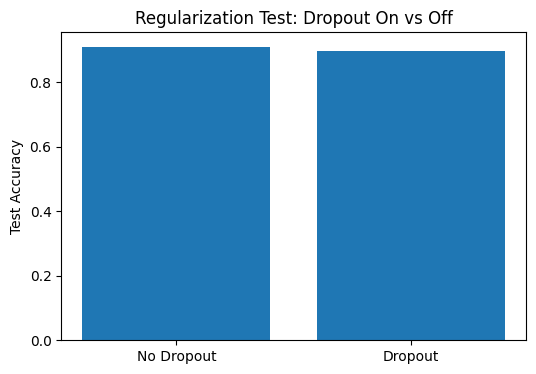

In [37]:
labels = ["No Dropout", "Dropout"]
plt.figure(figsize=(6, 4))
plt.bar(labels, dropout_accs)
plt.ylabel("Test Accuracy")
plt.title("Regularization Test: Dropout On vs Off")
plt.show()

In [38]:
print("\nHyperparameter Results (Filters):")
for f, acc in zip(filter_values, test_accuracies):
    print(f"  Filters={f}: {acc*100:.2f}%")

print("\nRegularization Results (Dropout):")
for flag, acc in zip(dropout_options, dropout_accs):
    print(f"  Dropout={flag}: {acc*100:.2f}%")



Hyperparameter Results (Filters):
  Filters=16: 90.58%
  Filters=32: 90.61%
  Filters=64: 91.25%

Regularization Results (Dropout):
  Dropout=False: 90.99%
  Dropout=True: 89.86%


Reflection: 
Report on the performance of the models you tested. 

- Did any of the changes you made improve the model's performance? If so, which ones? 
    - Yes, but the improvement was small: Increasing filters to 64 improved test accuracy from ~90.6% to 91.25%

- What do you think contributed to these improvements? 
    - More filters = the CNN can learn more feature types (edges, textures, shapes).

- Finally, what combination of hyperparameters and regularization techniques yielded the best performance?
    - 64 filters + no Dropout. Best test accuracy: 91.25%

**Your answer here**


# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Final model using best hyperparameters/regularization found in previous tests
# Filters = 64 performed best
# Dropout = False performed best

final_model = Sequential()
final_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(MaxPooling2D((2, 2)))
final_model.add(Flatten())
final_model.add(Dense(128, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

final_model.fit(
    X_train,
    y_train_onehot,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

loss, accuracy = final_model.evaluate(X_test, y_test_onehot)

print(f"Final Model Loss: {loss:.2f}")
print(f"Final Model Accuracy: {accuracy*100:.2f}%")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8592 - loss: 0.3974 - val_accuracy: 0.8855 - val_loss: 0.3132
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9035 - loss: 0.2665 - val_accuracy: 0.9045 - val_loss: 0.2723
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9189 - loss: 0.2190 - val_accuracy: 0.9072 - val_loss: 0.2480
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9314 - loss: 0.1866 - val_accuracy: 0.9122 - val_loss: 0.2422
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9422 - loss: 0.1575 - val_accuracy: 0.9156 - val_loss: 0.2472
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9104 - loss: 0.2606
Final Model Loss: 0.26
Final Model Accuracy: 91.04%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
- Baseline model: ~10.33% accuracy
- Initial CNN model: 90.82% accuracy
- Final model: 91.04% accuracy

The big jump vs baseline comes from using a CNN, which learns spatial features (edges/textures/shapes) instead of treating pixels mostly independently. Final model also used the best setting from your tests.

If more time, then I would train with more epochs and see if test accuracy improves, and test a different kernel sizes. Try L2 regularization.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.